In [1]:
import numpy as np
import pandas as pd
import glob
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import os
from resampled import *

# Paper data

In [2]:
input = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Baseline paper data/Running/s100/lfoot/acc.npy", allow_pickle=True).astype(float)
print(input.shape)
print(input)
label = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Baseline paper data/Running/s100/lknee/angle.npy")
print(label.shape)
print(label)

(3600, 3)
[[  8.05741223 -23.64478881   8.13948426]
 [  9.12137073 -23.28251317   8.47151131]
 [ 10.2944156  -22.99317172   8.87490611]
 ...
 [ 21.63248482  10.01728682 -16.31198964]
 [ 22.32028038   9.24192971 -17.14280009]
 [ 22.62715327   8.1344764  -17.85270198]]
(3600, 3)
[[26.0780057  14.80332729 30.87394557]
 [25.21227994 14.65948876 31.22035722]
 [24.38548419 14.53784908 31.5518728 ]
 ...
 [47.91722791 30.78366317 24.70339122]
 [50.39159412 31.37120195 23.15896323]
 [52.80910067 31.84178522 21.63381334]]


# External data preprocessing (Seven things)

In [3]:
imu_merge_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/"
angle_merge_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles"

### Merge dataset

In [ ]:
#def merge_csv_files(folder_path):
#    # Get all subdirectories (SUB folders)
#    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
#    
#    for sub_dir in sub_dirs:
#        for category in ["Walk", "Run"]:
#            category_path = os.path.join(sub_dir, category)
#            file_paths = sorted(glob.glob(f"{category_path}/*.csv"))
#            
#            if not file_paths:
#                print(f"No file in: {category_path}")
#                continue
#            
#            '''Merge all files'''
#            # Read the first file and manually retain the first row (body part) and header
#            main_df = pd.read_csv(file_paths[0], header=None, keep_default_na=False)
#            # Read the remaining files (without headers, ensuring column alignment)
#            dfs = [pd.read_csv(file, header=None, names=main_df.columns, skiprows=3, keep_default_na=False) for file in file_paths[1:]]
#            # Merge all DataFrames
#            merged_df = pd.concat([main_df] + dfs, ignore_index=True)
#            
#            '''Save merged data'''
#            # Define output file path
#            output_file = os.path.join(category_path, f"Merged_{category}.csv")
#            
#            # Save the merged DataFrame as a new CSV file
#            merged_df.to_csv(output_file, index=False, header=True)
#            print(f"Merge completed, saved as: {output_file}")
#            
#merge_csv_files(angle_merge_path)

### Generate resampled dataset (input)

In [ ]:
#def generate_resample_csv_files(folder_path):
#    # Get all subdirectories (SUB folders)
#    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
#    
#    for sub_dir in sub_dirs:
#        for category in ["Walk", "Run"]:
#            category_path = os.path.join(sub_dir, category)
#            file_paths = sorted(glob.glob(f"{category_path}/Merged*.csv"))
#            if not file_paths:
#                print(f"No file in: {category_path}")
#                continue
#            #print("File path:", file_paths[0])
#            #print("Type:", type(file_paths[0]))
#
#            
#            '''Merge all files'''
#            # Load and resample
#            #df_raw = load_imu_data(file_paths[0])
#            #df_resampled = resample_full_data_with_time_gaps(df_raw)
#            
#            df_raw = load_angle_data(file_paths[0])
#            df_resampled = resample_full_data_from_index_reset(df_raw)
#            
#            df_resampled.to_csv(os.path.join(category_path, f"resmapled_{category}.csv"), index=False)
#
#            # Choose a column to visualize (adjust index as needed)
#            #target_column = 'LeftFoot_Accelerometer_X'
#            #plot_sensor_waveform(df_resampled, target_column)
#            
#generate_resample_csv_files(imu_merge_path)

#### resample imu input

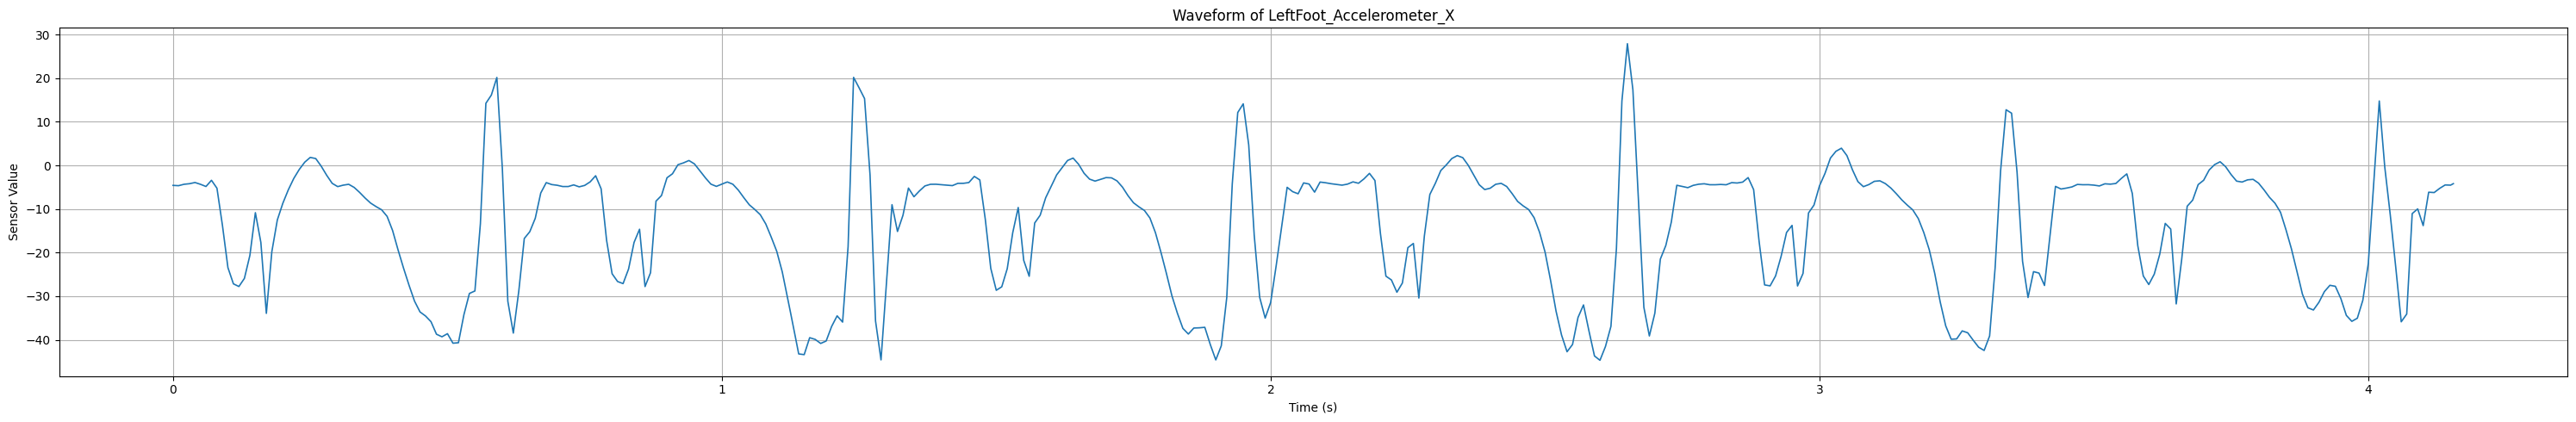

In [7]:
df_resample = pd.read_csv("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/SUB01/Walk/resmapled_Walk.csv")
target_column = 'LeftFoot_Accelerometer_X'
plot_sensor_waveform(df_resample, target_column)

#### resample angle label

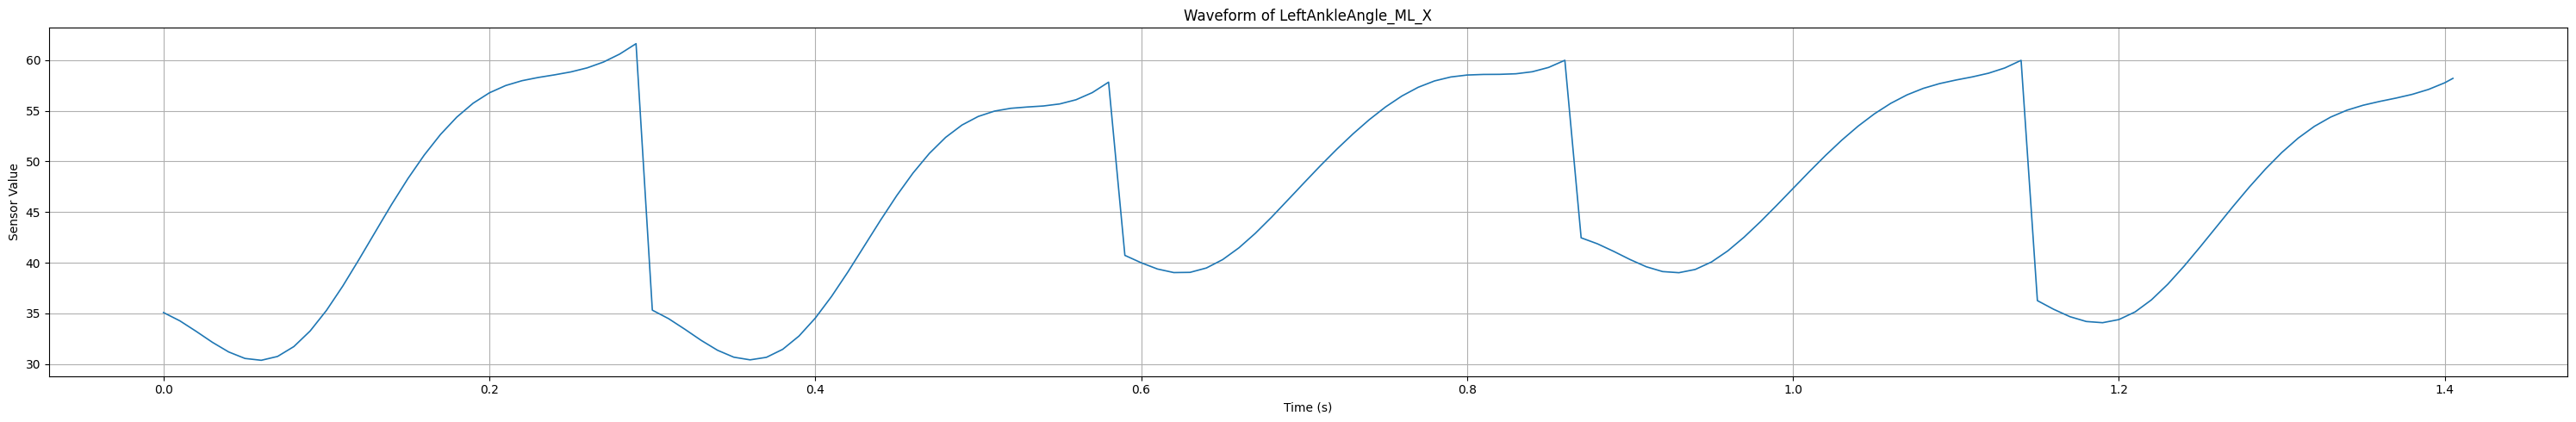

In [ ]:
df_resample = pd.read_csv("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles/SUB01/Run/resampled_Run.csv")
target_column = 'LeftAngle_ML_X'
plot_sensor_waveform(df_resample, target_column)

# Lab Data

### imu

(23115, 3)


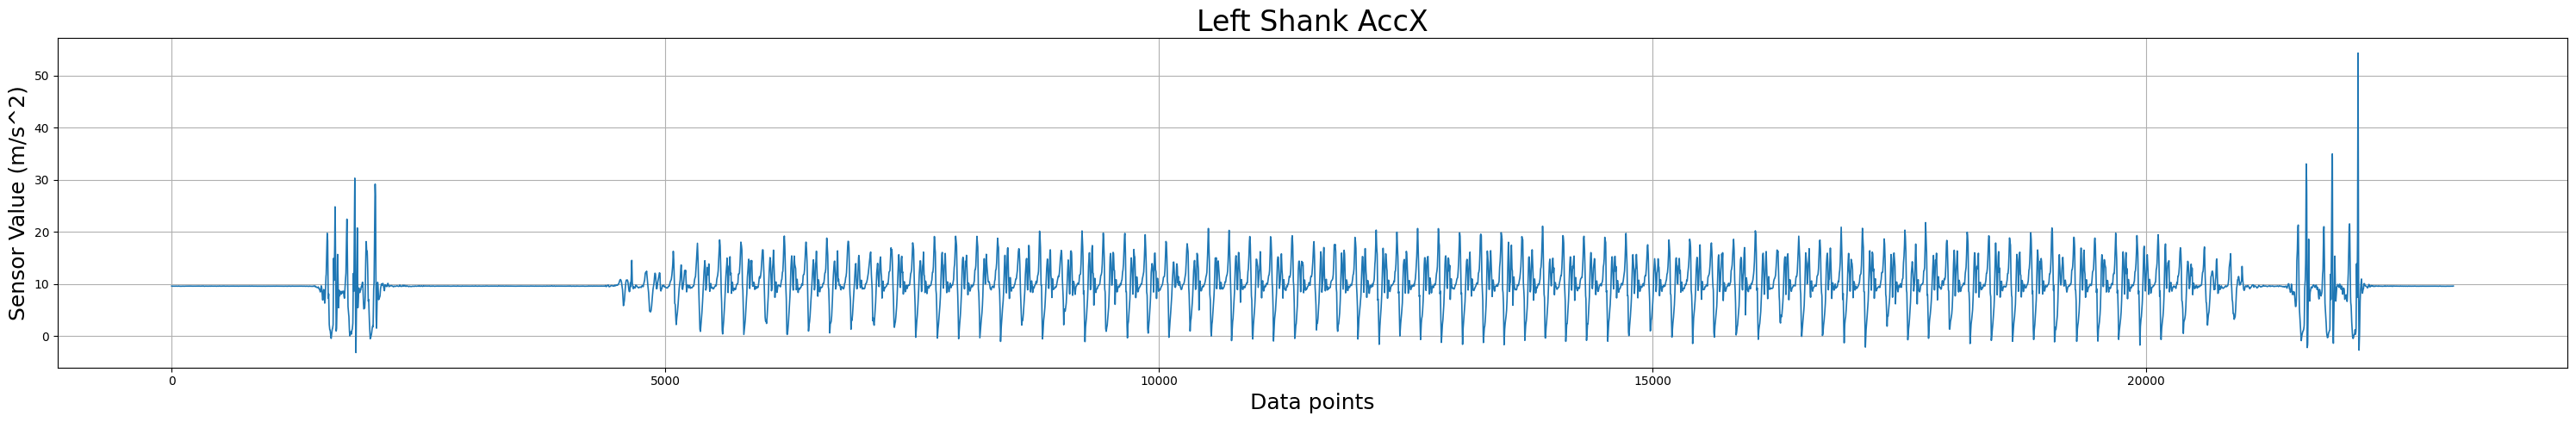

In [3]:
imu_data = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Lab_resampled data/Walking/S001/LeftShank/acc.npy")
print(imu_data.shape)
target_column = 'Left Shank AccX'
time = np.arange(imu_data.shape[0])
period = (0,imu_data.shape[0])
plot_sensor_waveform(imu_data, time, period, target_column)

### angle

(22550, 3)


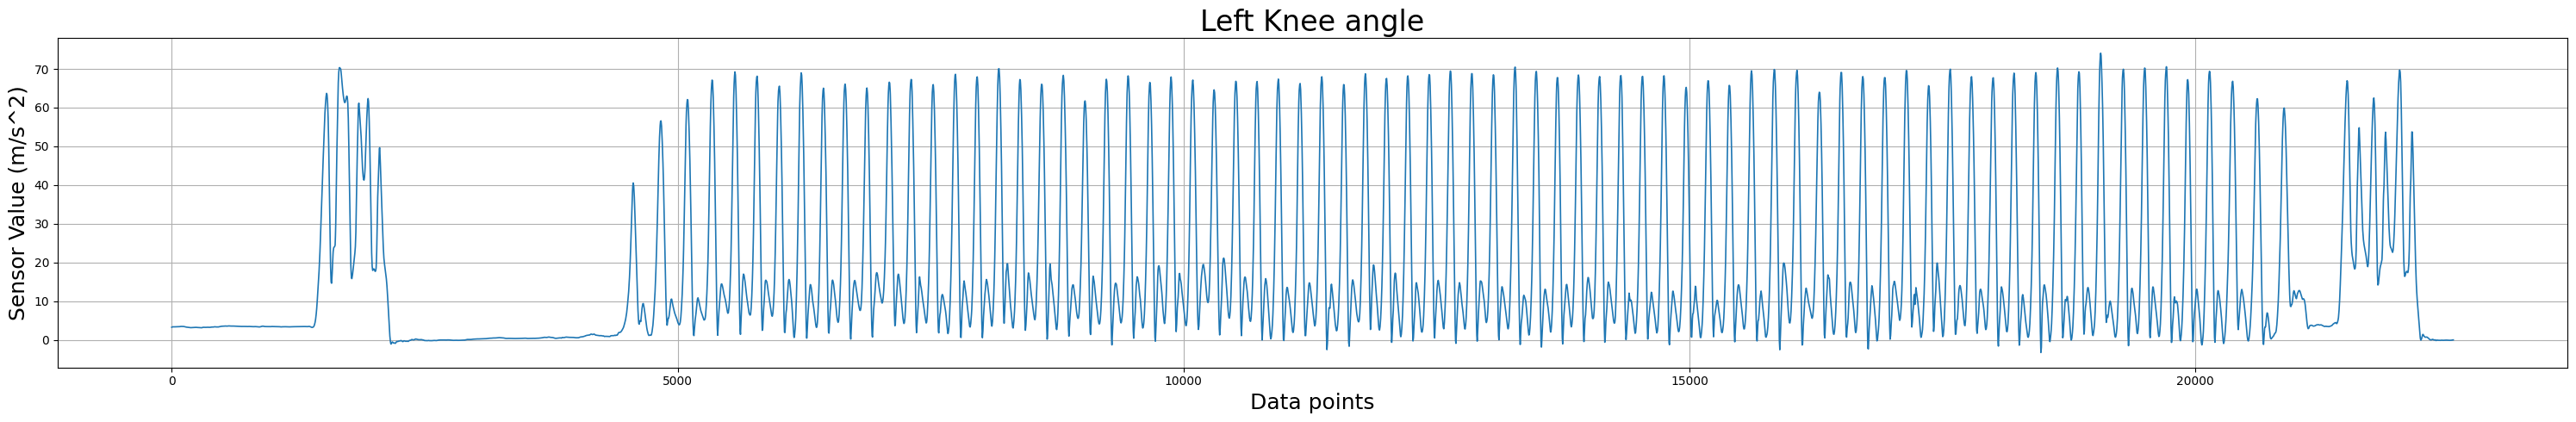

In [4]:
angle_data = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Lab_resampled data/Walking/S001/LeftKneeAngle/angle.npy")
print(angle_data.shape)
target_column = 'Left Knee angle'
time = np.arange(angle_data.shape[0])
period = (0,angle_data.shape[0])
plot_sensor_waveform(angle_data, time, period, target_column)

### Time Shift problem

In [9]:
def find_alignment_peaks(signal_1, signal_2, prominence_1=0.2, prominence_2=0.3, distance=100, normalize=True, plot=True):
    """
    Find the first 3 peaks in two signals and calculate the alignment offset.
    
    Parameters:
    - signal_1: np.array, first signal (e.g., IMU)
    - signal_2: np.array, second signal (e.g., angle)
    - height_1: float, peak height threshold for signal_1
    - height_2: float, peak height threshold for signal_2
    - distance: int, minimum distance between peaks
    - plot: bool, whether to show plots with detected peaks

    Returns:
    - imu_peaks_3: first 3 peak indices in signal_1
    - angle_peaks_3: first 3 peak indices in signal_2
    - time_shift: offset in indices (positive means signal_1 is ahead)
    """

    '''
    # Find peaks in both signals
    peaks_1, _ = find_peaks(signal_1, height=height_1, distance=distance)
    peaks_2, _ = find_peaks(signal_2, height=height_2, distance=distance)

    # Take the first 3
    imu_peaks_3 = peaks_1[:3]
    angle_peaks_3 = peaks_2[:3]

    # Calculate time shift (based on first peak)
    time_shift = imu_peaks_3[0] - angle_peaks_3[0]
    '''
    def normalize(x):
        return (x - np.min(x)) / (np.max(x) - np.min(x)) if normalize else x
    
    signal_1 = signal_1[:,0]
    signal_2 = signal_2[:,0]

    signal_1 = normalize(signal_1)
    signal_2 = normalize(signal_2)

    peaks_1, _ = find_peaks(signal_1, prominence=prominence_1, distance=distance)
    peaks_2, _ = find_peaks(signal_2, prominence=prominence_2, distance=distance)

    # Take first 3
    imu_peaks_3 = peaks_1[:3]
    angle_peaks_3 = peaks_2[:3]

    time_shift = imu_peaks_3[0] - angle_peaks_3[0]
    
    
    # Optional plot
    if plot:
        plt.figure(figsize=(14, 5))

        plt.subplot(2, 1, 1)
        #plt.plot(signal_1, label='Signal 1 (e.g. IMU)')
        plt.plot(signal_1[3500+time_shift:21000+time_shift], label='Signal 1 (IMU)')
        #plt.plot(imu_peaks_3, signal_1[imu_peaks_3], 'rx')
        plt.title('Signal IMU')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        #plt.plot(signal_2, label='Signal 2 (Angle)')
        plt.plot(signal_2[3500:21000], label='Signal 2 (Angle)')
        #plt.plot(angle_peaks_3, signal_2[angle_peaks_3], 'rx')
        plt.title('Signal Angle')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    return imu_peaks_3, angle_peaks_3, time_shift

#### First three peak

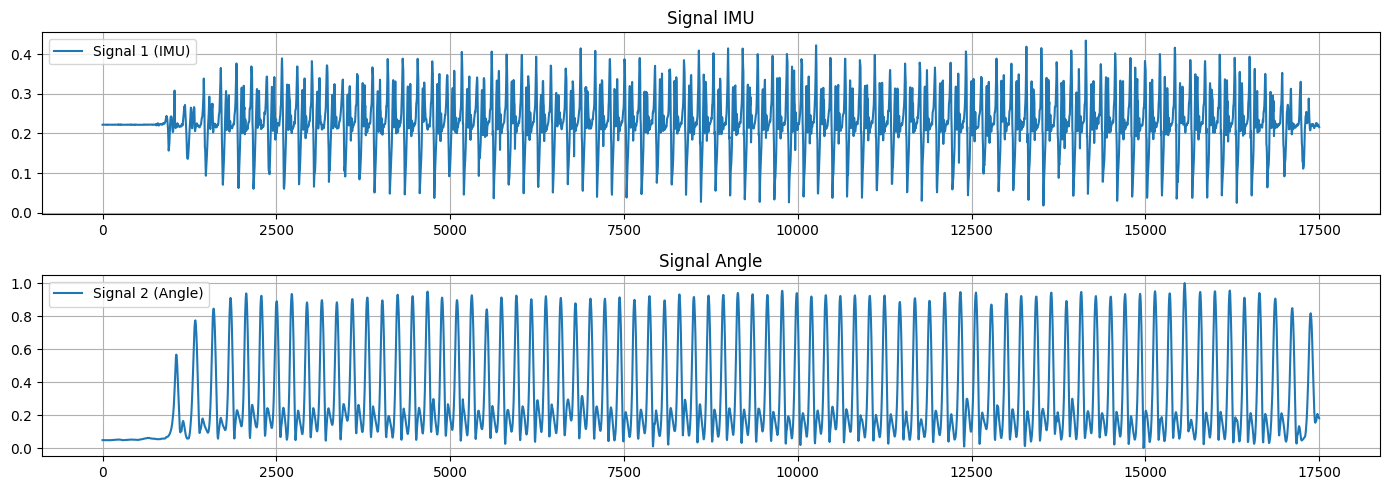

First 3 IMU peaks: [1655 1855 2061]
First 3 Angle peaks: [1530 1660 1940]
Suggested time shift (index offset): 125


In [10]:
#imu_signal = imu_data[:, 0]  # or whichever axis/column you use
#angle_signal = angle_data[:, 0]

imu_peaks, angle_peaks, offset = find_alignment_peaks(imu_data, angle_data)
print("First 3 IMU peaks:", imu_peaks)
print("First 3 Angle peaks:", angle_peaks)
print("Suggested time shift (index offset):", offset)

#### Last three peak

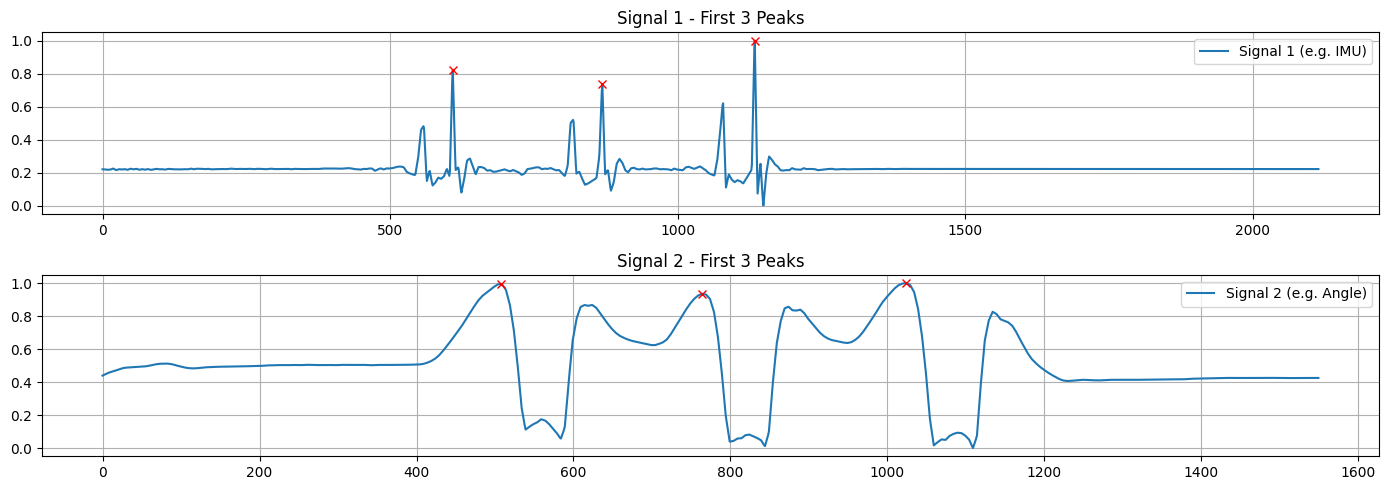

Last 3 IMU peaks: [ 609  869 1134]
Last 3 Angle peaks: [ 508  764 1024]
Suggested time shift (index offset): 101


In [6]:
imu_signal = imu_data[21000:, 0]  # or whichever axis/column you use
angle_signal = angle_data[21000:, 0]

imu_peaks, angle_peaks, offset = find_alignment_peaks(imu_signal, angle_signal)
print("Last 3 IMU peaks:", imu_peaks)
print("Last 3 Angle peaks:", angle_peaks)
print("Suggested time shift (index offset):", offset)

(17500,)
(17500,)


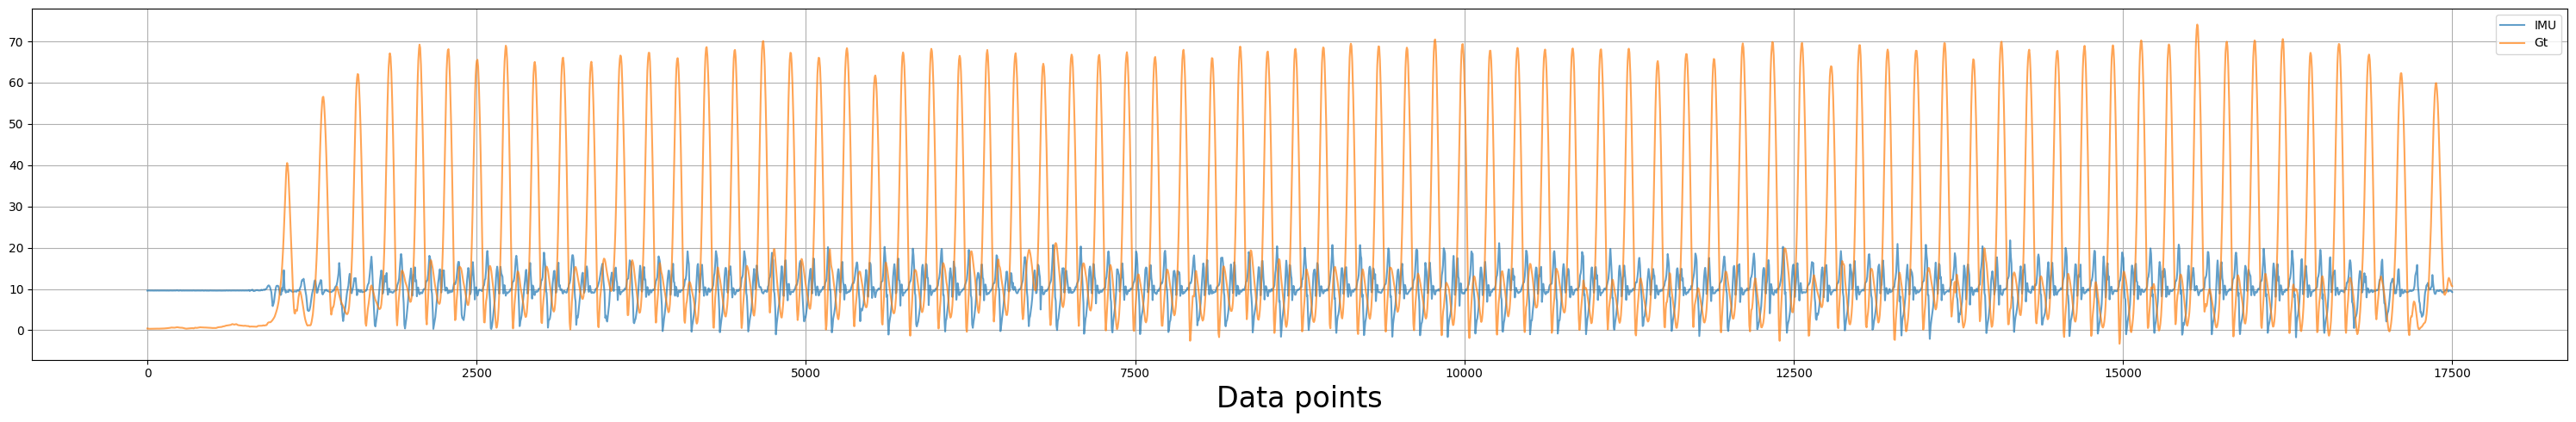

In [8]:
walking_start = 3500
walking_end = 21000
imu_signal = imu_data[walking_start+offset: walking_end+offset, 0] 
print(imu_signal.shape)
angle_signal = angle_data[walking_start:walking_end, 0]
print(angle_signal.shape)

plot_imu_gt_comparison(imu_signal, angle_signal)

### imu trend comparison

Lab data Imu time step: 23115
Lab data angle time step: 22550
11600
11600


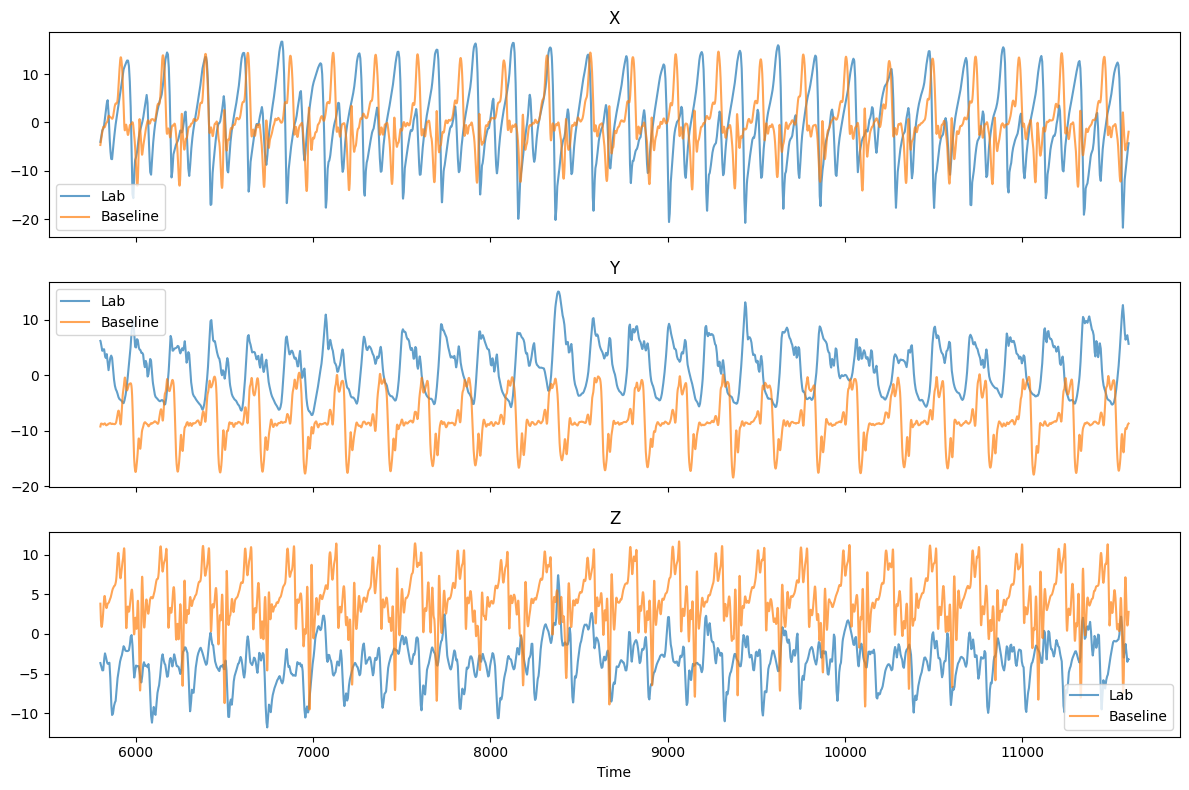

In [7]:
## === Load and Prepare Data ===
#file_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/SUB01/Walk/resmapled_Walk.csv"
#df_resampled = pd.read_csv(file_path)
#
# Extract LeftFoot Accelerometer Data (X, Y, Z)
#csv_lfoot_acc = df_resampled[['LeftFoot_Accelerometer_X', 'LeftFoot_Accelerometer_Y', 'LeftFoot_Accelerometer_Z']]
#time_csv = np.arange(len(csv_lfoot_acc))
external = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Lab_resampled data/Walking/S001/LeftShank/acc.npy")
time_csv = np.arange(external.shape[0])
print(f"Lab data Imu time step: {external.shape[0]}")
external = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Lab_resampled data/Walking/S001/LeftAnkleAngle/angle.npy")
time_csv = np.arange(external.shape[0])
print(f"Lab data angle time step: {external.shape[0]}")
#
# Load .npy data
ori = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Baseline paper data/Walking/s100/lshank/acc.npy")
time_npy = np.arange(ori.shape[0])  # or provide actual time vector if available
print(ori.shape[0])
#
# Plot together
plot_sensor_waveform_comparison(external, ori, time_csv, time_npy, 'LeftFoot_Accelerometer')

### angle comparison

Lab data angle time step: 22550
3600


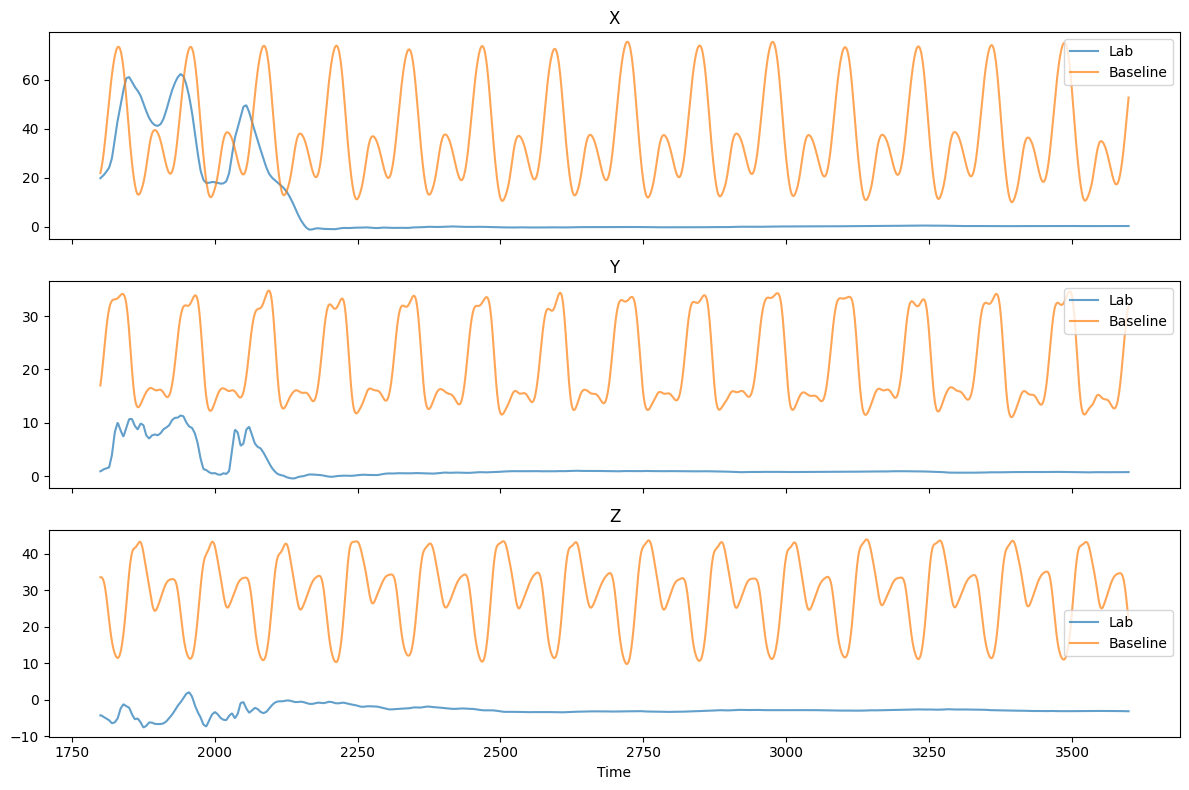

In [8]:
## === Load and Prepare Data ===
file_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles/SUB01/Run/resampled_Run.csv"
df_resampled = pd.read_csv(file_path)
#
# Extract LeftFoot Accelerometer Data (X, Y, Z)
#csv_lfoot_acc = df_resampled[['LeftAnkleAngle_ML_X', 'LeftAnkleAngle_ML_Y', 'LeftAnkleAngle_ML_Z']]
#time_csv = np.arange(len(csv_lfoot_acc))

external = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Lab_resampled data/Walking/S001/LeftKneeAngle/angle.npy")
time_csv = np.arange(external.shape[0])
print(f"Lab data angle time step: {external.shape[0]}")
#
# Load .npy data
ori = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Baseline paper data/Running/s100/lknee/angle.npy")
time_npy = np.arange(ori.shape[0])  # or provide actual time vector if available
#
# Plot together
#plot_sensor_waveform_comparison(csv_lfoot_acc, ori, time_csv, time_npy, 'LeftAnkleAngle_ML')
plot_sensor_waveform_comparison(external, ori, time_csv, time_npy, 'LeftAnkleAngle_ML')

# Generate npy

### Create folder

In [6]:
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [10]:
patients = ['SUB01', 'SUB02', 'SUB03', 'SUB04', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09', 
            'SUB10', 'SUB11', 'SUB12', 'SUB13', 'SUB14','SUB15', 'SUB16', 'SUB17', 'SUB18', 'SUB19']
motions = ['Walk', 'Run']
# Define body parts to extract
body_parts = ["Pelvis", "LeftThigh", "RightThigh", "LeftShank", "RightShank", "LeftFoot", "RightFoot"]
angle_parts = ["LeftAnkleAngle", "RightAnkleAngle", "LeftHipAngle", "RightHipAngle", "LeftKneeAngle", "RightKneeAngle"]
for patient in patients:
    for motion in motions:
        for part in body_parts:
            os.makedirs(os.path.join(processed_data_path, patient, motion, part), exist_ok=True)

### Generate npy files

In [13]:
folder_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles"
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [24]:
def generate_angle_npy(folder_path, processed_data_path):
    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
    
    for sub_dir in sub_dirs:
        patient_number = os.path.basename(os.path.normpath(sub_dir))
        for category in ["Walk", "Run"]:
            category_path = os.path.join(sub_dir, category)
            file_paths = sorted(glob.glob(f"{category_path}/resampled*.csv"))
            
            if not file_paths:
                continue  # Skip if no matching file
            
            # Directly read CSV with headers
            df = pd.read_csv(file_paths[0])
            
            # Define body parts to extract
            angle_parts = [
                "LeftAnkleAngle", "RightAnkleAngle",
                "LeftHipAngle", "RightHipAngle",
                "LeftKneeAngle", "RightKneeAngle"
            ]
            
            for part in angle_parts:
                # Get columns like 'LeftAnkleAngle_ML_X', 'LeftAnkleAngle_ML_Y', 'LeftAnkleAngle_ML_Z'
                angle_columns = [f"{part}_ML_X", f"{part}_ML_Y", f"{part}_ML_Z"]
                
                if all(col in df.columns for col in angle_columns):
                    angles_data = df[angle_columns].to_numpy()
                    
                    save_path = os.path.join(processed_data_path, category, patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "angle.npy"), angles_data)
                    print(os.path.join(save_path, "angle.npy"))
                    
generate_angle_npy(folder_path, processed_data_path)

/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftHipAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightHipAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Run/SUB01/LeftAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preproce

In [11]:
folder_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv"
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [13]:
def generate_imu_npy(folder_path, processed_data_path):
    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
    
    for sub_dir in sub_dirs:
        patient_number = os.path.basename(os.path.normpath(sub_dir))
        for category in ["Walk", "Run"]:
            category_path = os.path.join(sub_dir, category)
            file_paths = sorted(glob.glob(f"{category_path}/resmapled*.csv"))
            
            if not file_paths:
                continue
        
            df = pd.read_csv(file_paths[0])  # Read with header

            # Define body parts to extract
            body_parts = ["Pelvis", "LeftThigh", "RightThigh", "LeftShank", "RightShank", "LeftFoot", "RightFoot"]

            for part in body_parts:
                acc_columns = [f"{part}_Accelerometer_X", f"{part}_Accelerometer_Y", f"{part}_Accelerometer_Z"]
                gyr_columns = [f"{part}_Gyroscope_X", f"{part}_Gyroscope_Y", f"{part}_Gyroscope_Z"]

                # Check if columns exist before extracting
                if all(col in df.columns for col in acc_columns):
                    acc_data = df[acc_columns].to_numpy()
                    save_path = os.path.join(processed_data_path, category,patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "acc.npy"), acc_data)
                    print("Saving to:", os.path.join(save_path, "acc.npy"))
                else: print("No")

                if all(col in df.columns for col in gyr_columns):
                    gyr_data = df[gyr_columns].to_numpy()
                    save_path = os.path.join(processed_data_path, category,patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "gyr.npy"), gyr_data)
                    print("Saving to:", os.path.join(save_path, "gyr.npy"))
                else: print("No")

generate_imu_npy(folder_path, processed_data_path)

Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/Pelvis/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/Pelvis/gyr.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftThigh/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftThigh/gyr.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightThigh/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/w